## Bloco 3

### Agrupamento com K-Means: atividade 02

---

O método ***K-Means***, no contexto de aprendizado de máquina não supervisionado, se trata de um algoritmo capaz de dividir os dados que temos em diferentes grupos, através da utilização das médias de cada cluster e variância para identificar os grupos de forma otimizada, mas enfim vamos ver isso tudo em mais detalhes no decorrer do notebook.

- Importando o *dataset* e as bibliotecas necessárias para aplicar o algoritmo:

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Importando o dataframe do arquivo "data_artigo.csv"
#OBS: nosso dataframe já está normalizado
#Definindo nossas features e o nosso target

df_art = pd.read_csv('data_artigo.csv')
df_art = df_art.drop("Unnamed: 0",axis=1)
FEATURES = df_art.columns.values[4:]
TARGET = ["Idade"]
A = df_art.reindex(FEATURES, axis=1).values
print(df_art)

       Amostra    Sexo Categoria Idade  Idade      MMP1          MMP3  \
0    GTEX-U8XE    male           Jovem  30-39  0.415301  1.959855e-02   
1    GTEX-UPJH    male          Adulto  50-59  0.000005  7.996788e-03   
2    GTEX-UPK5    male          Adulto  40-49  0.000000  7.149739e-03   
3    GTEX-V1D1    male          Adulto  50-59  0.000000  0.000000e+00   
4    GTEX-VJYA    male           Idoso  60-69  0.000000  1.969892e-02   
..         ...     ...             ...    ...       ...           ...   
105  GTEX-ZYVF  female          Adulto  50-59  0.000024  1.819350e-07   
106  GTEX-ZYW4    male           Idoso  60-69  0.000023  5.150542e-03   
107  GTEX-ZYY3  female           Idoso  60-69  0.000003  2.070253e-07   
108  GTEX-ZZ64    male           Jovem  20-29  0.000001  3.753111e-02   
109  GTEX-ZZPU  female          Adulto  50-59  0.000000  1.586110e-02   

         MMP9         MMP11     MMP24     MMP27     BARD1     BCL7C   CLPTM1L  \
0    0.609227  8.821049e-02  0.000014  0.8

- Rodando o K-Means com inicialmente 3 clusters que vão gerar dados de K-Mean *fittados*, logo vamos plotar os mesmos e diferenciar os grupos por cor;

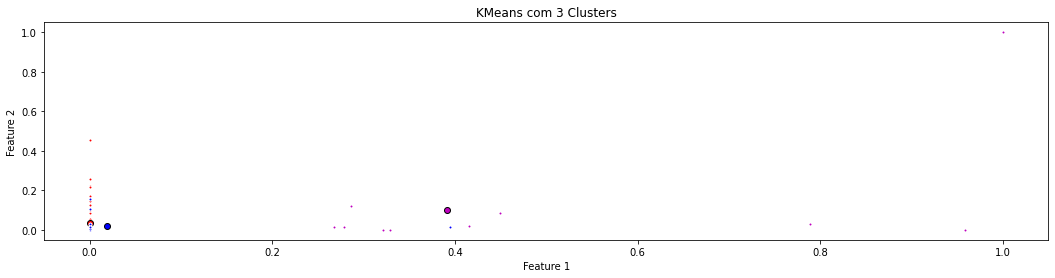

In [3]:
n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(A) #Fita o K-Means

from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(A, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        A[my_members, 0],    #Coordenada do eixo-x
        A[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans com 3 Clusters")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

Como podemos notar, o gráfico de K-Means não se demonstrou muito eficiente, uma vez que os dados não aparentam estar bem distribuídos. Além disso, não parece que 3 clusters seja a melhor divisão para nossos dados, portanto, tentaremos agora utilizar o PCA, a fim de aplicar K-Means nas componentes principais obtidas

- Aplicando o PCA ao nosso dataframe

In [4]:
pca = PCA()
pca.fit(A)
Aa = pca.transform(A)

In [5]:
#Testando agora com o PCA adicionado
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

b_kmeans = kmeans.fit_predict(Aa)

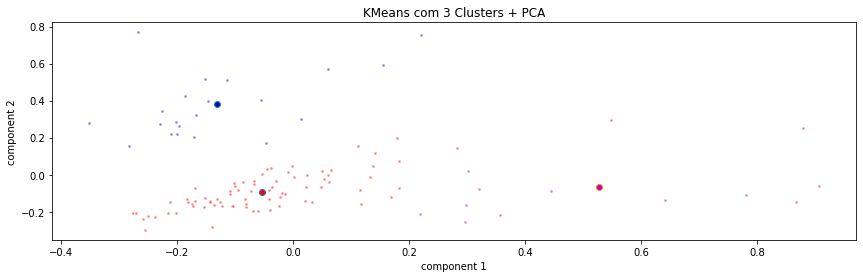

In [6]:
#Vamos apenas repetir o processo com o PCA adicionado em busca de um plot melhor
centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(Aa, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        Aa[my_members, 0],
        Aa[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans com 3 Clusters + PCA")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

Nesse caso, aparentemente temos uma melhor divisão dos dados que temos, porém mesmo assim nossos dados aparentam estar dispersos, podemos melhorar esse plot tentando achar um número ideal de clusters para os nossos dados, utilizando o método do cotovelo ou do ombro;

- Buscando o número ideal de clusters;

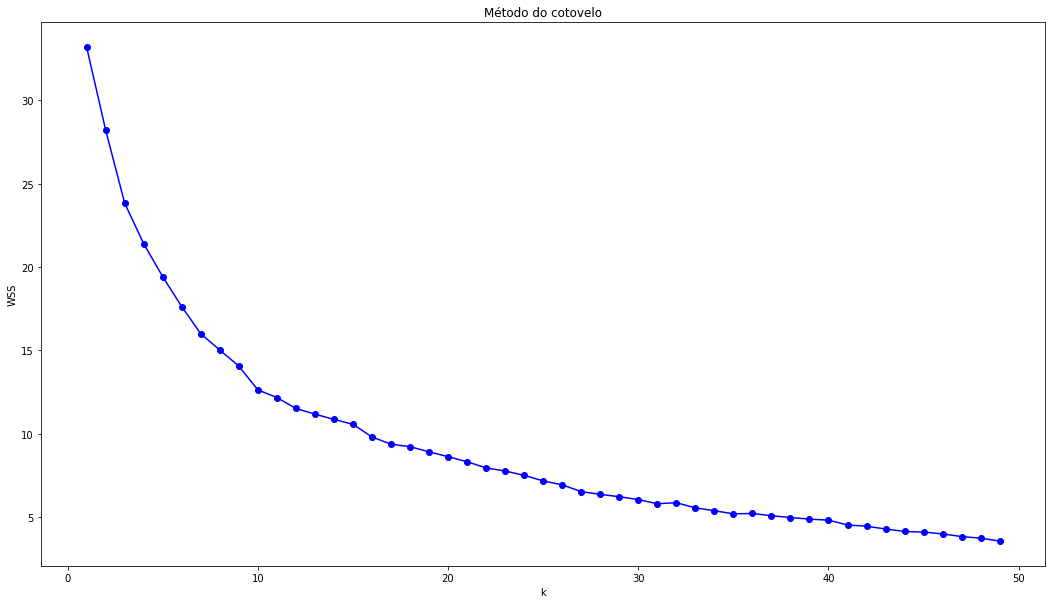

In [7]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,50):
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=50, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    b_kmeans = kmeans.fit_predict(Aa) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,50), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()                               #Mostra o gráfico

Aplicamos o método do cotovelo com alguns números de clusters e o plot que melhor demonstra o método do cotovelo é esse de 1 a 50 clusters. A partir desse plot notamos que o número ideal de clusters está entre 10 e 7, logo, vamos utilizar 8 clusters (para seguir esse método) e 6 clusters para tentar achar uma relação com as nossas faixas de idade.

- Aplicando o K-Means com 8 e 6 clusters;

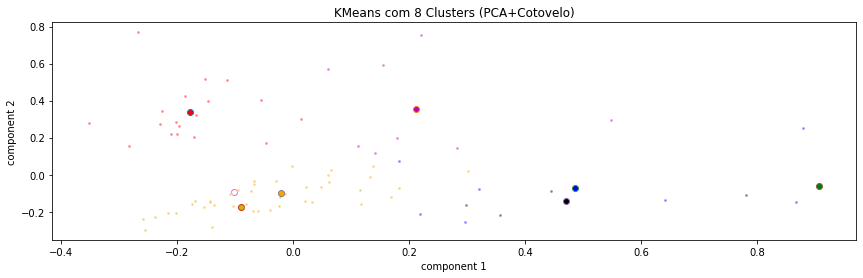

In [8]:
n_clusters=8

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

b_kmeans = kmeans.fit_predict(Aa)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(Aa, centroids)
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        Aa[my_members, 0],
        Aa[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans com 8 Clusters (PCA+Cotovelo)")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

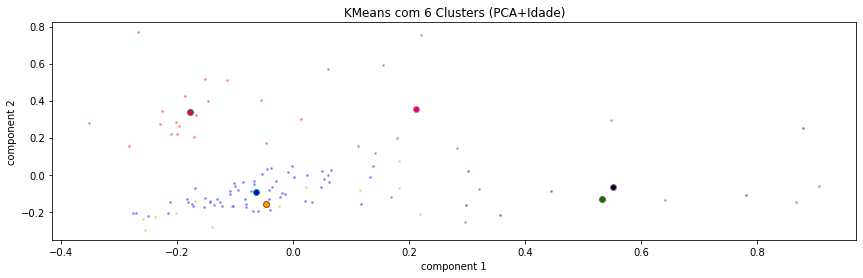

In [9]:
n_clusters=6

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

b_kmeans = kmeans.fit_predict(Aa)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(Aa, centroids)
colors = ["r", "m", "b", "y", "k", "g"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        Aa[my_members, 0],
        Aa[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans com 6 Clusters (PCA+Idade)")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

Concluímos que os dois plots são de certa forma eficientes, mas de jeitos diferentes, para fazer uma comparação ideal temos que diferenciar nossas faixas de idades de outra forma e produzir um gráfico 3D para tentar melhorar as possíveis interpretações.

OBS: considerando que temos 11 dimensões (devido aos nossos dados), um gráfico 3D pode ajudar mais que um 2D. O ideal séria produzir um gráfico 11D, mas infelizmente isso não parece ser possível.

- Transformando as faixas de idade em uma média para gerar plots melhores;

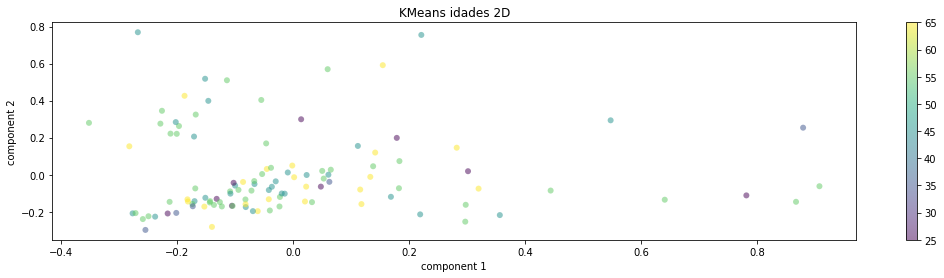

In [10]:
#Vamos fazer uma média das faixas de idade para fazer o gráfico colorido a partir das idades
#OBS: df_data_art é igual ao df_art

df_data_art = pd.read_csv("data_artigo.csv") #Importando o dataframe com nome diferente
df_data_art = df_data_art.drop("Unnamed: 0", axis=1)

df_data_art['Idade']=df_data_art['Idade'].replace('20-29',int(25))
df_data_art['Idade']=df_data_art['Idade'].replace('30-39',int(35))
df_data_art['Idade']=df_data_art['Idade'].replace('40-49',int(45))
df_data_art['Idade']=df_data_art['Idade'].replace('50-59',int(55))
df_data_art['Idade']=df_data_art['Idade'].replace('60-69',int(65))
df_data_art['Idade']=df_data_art['Idade'].replace('70-79',int(75))
df_data_art

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(Aa[:, 0], Aa[:, 1], edgecolor='none', alpha=0.5, c=df_data_art["Idade"].values)
ax.set_title("KMeans idades 2D")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Esse plot demonstra uma distribuição de dados dificil de ser interpretada, afinal estamos em um gráfico 2D.
Além de ser um gráfico 2D, devemos considerar a quantidade de features que implicam a necessidade de um gráfico 11D, mas isso só seria possivel em um mundo ideal, logo, vamos produzir um gráfico 3D para tentar melhorar a interpretação do gráfico.

- Produzindo um plot 3D

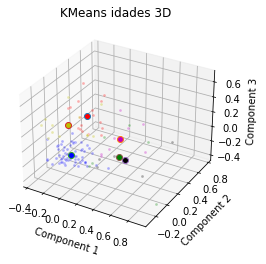

In [11]:
n_clusters= 6

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

b_kmeans = kmeans.fit_predict(Aa)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(Aa, centroids)
colors = ["r", "m", "b", "y", "k", "g"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        Aa[my_members, 0], 
        Aa[my_members, 1],
        Aa[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        markersize=6,
    )

ax.set_title("KMeans idades 3D")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

Infelizmente não podemos afirmar se o agrupamento funcionou, pois ainda precisaríamos de um plot 11D, mas já houve uma pequena melhora, pois o plot já apresenta clusters mais definidos para 4 dos clusters e para os outros 2 (Verde e Roxo) temos um problema, pois há uma sobreposição de clusters, isso poderia ser resolvido com um plot com mais dimensões, mas isso não é possível.

Agora mesmo não tendo o melhor plot para as faixas de idade, temos um plot 3D então tambem devemos produzir um plot 3D para o número de clusters indicado pelo método do cotovelo (8 Clusters)

- Produzindo um plot 3D para os 8 Clusters

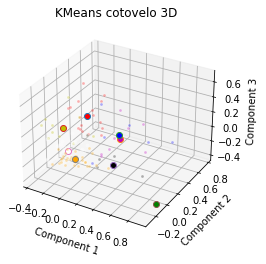

In [12]:
n_clusters= 8

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

b_kmeans = kmeans.fit_predict(Aa)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(Aa, centroids)
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        Aa[my_members, 0], 
        Aa[my_members, 1],
        Aa[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        markersize=6,
    )

ax.set_title("KMeans cotovelo 3D")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

Infelizmente temos a situação do plot 3D com 6 clusters se repetindo, podemos notar uma melhora na definição de 6 clusters, mas há uma sobreposição dos clusters Azul e Laranja, isso seria provavelmente resolvido com um plot com mais dimensões, mas isso nos leva ao mundo ideal ao qual não temos acesso. 

- Conclusão do Kmeans 3D;

Vamos fazer a conclusão baseada nos plots 3D, afinal eles são a melhor representação possível dos nossos dados, fazendo essa comparação entre os dois plots 3D (8 e 6 Clusters) até podemos ver alguma relação entre os dados do dataframe e os clusters, mas não podemos concluir que isso está correto ou sequer concluir novas interpretações para esses plots, pois temos um problema nos 2 plots, a sobreposição de clusters indica uma eficiência baixa com o número de dimensões e o problema da natureza dos nossos dados, mas infelizmente 3 dimensões é o número máximo que podemos plotar, logo, temos 3 conclusões possíveis;

    1 - Escolher eliminar dados para diminuir o número ideal de dimensões, com a esperança de que o plot 3D melhore.

    2 - Fazer uma análise estatística dos dados e agrupá-los em grupos maiores, também diminuindo o número ideal de dimensões, com a mesma esperança do item 1.

    3 - Escolher outro método de clustering para os nossos dados, mas isso implica em começar uma nova análise.
    
Nenhuma das três opções é boa, pois a 1 considerar eliminar dados, a 2 considera diminuir a complexidade dos dados, isso dificultaria o objetivo inicial do projeto, e a 3 considera utilizar outro método e isso pode até resolver o problema da sobreposição de dimensões, mas isso não vai mudar a natureza biológica dos dados, essa natureza que complica interpretar os dados, pois os dados são tão complexos que precisaríamos de 11 dimensões para entender verdadeiramente os dados.

OBS1: A decisão tomada podem impactar os futuros notebooks, mas esse notebook dificilmente será modificado, afinal resultado nulo e negativo ainda são resultados

OBS2: Quando uma decisão for tomada, esse notebook pode receber a real interpretação dos plots, mesmo com os clusters sobrepostos, mas essas interpretações podem não apresentar a realmente as informações dos nossos dados.

- Método Óptica

Após uma análise do método Kmeans, escolhemos um segundo método para fazer uma comparação.

O método óptica cria um gráfico de acessibilidade, que atribui aos grupos de dados (reachability) uma distância e um ponto dentro do (orddering) atributo de origem (cluster).

Pelo gráfico de acessibilidade podemos extrair a densidade variável dos clusters em um único conjunto de dados, produzindo uma zona que vamos chamar de cluster, nos gráficos isso pode aparecer em forma de linha. 

O método também tem um adicional que é o uso do DBSCAN produz duas linhas de corte acima desse conjunto, logo, tudo acima de uma linha é considerado ruido, ou seja, nossos outliers.

Para a produção e interpretação de outliers vá ao próximo capítulo/notebook, pois apenas lá terá uma boa explicação sobre esse tema.

In [13]:
#Importando as bibliotecas
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

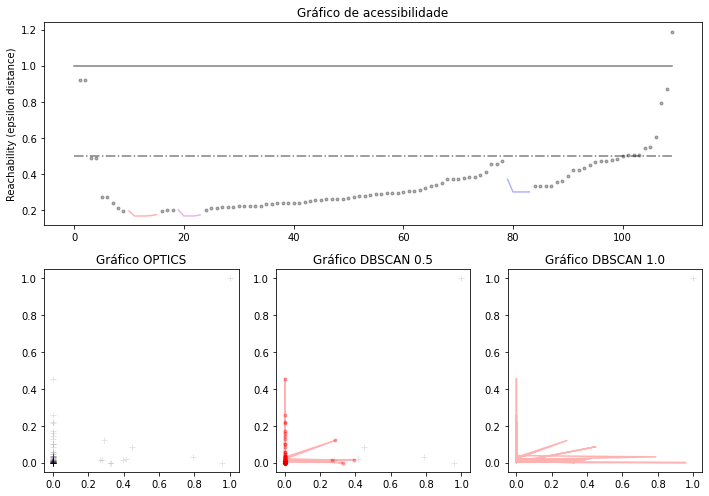

In [55]:
#Método opticas

clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

clust.fit(A)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=1,
)

space = np.arange(len(A))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Gráfico de acessibilidade
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 5), colors):
    Ak = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Ak, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 1, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Gráfico de acessibilidade")

# gráfico optica
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Ak = A[clust.labels_ == klass]
    ax2.plot(Ak[:, 0], Ak[:, 1], color, alpha=0.4)
ax2.plot(A[clust.labels_ == -1, 0], A[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Gráfico OPTICS")

# gráfico DBSCAN 0.5
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Ak = A[labels_050 == klass]
    ax3.plot(Ak[:, 0], Ak[:, 1], color, alpha=0.3, marker=".")
ax3.plot(A[labels_050 == -1, 0], A[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Gráfico DBSCAN 0.5")

# gráfico DBSCAN 2.
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Ak = A[labels_200 == klass]
    ax4.plot(Ak[:, 0], Ak[:, 1], color, alpha=0.3)
ax4.plot(A[labels_200 == -1, 0], A[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Gráfico DBSCAN 1.0")

plt.tight_layout()
plt.show()

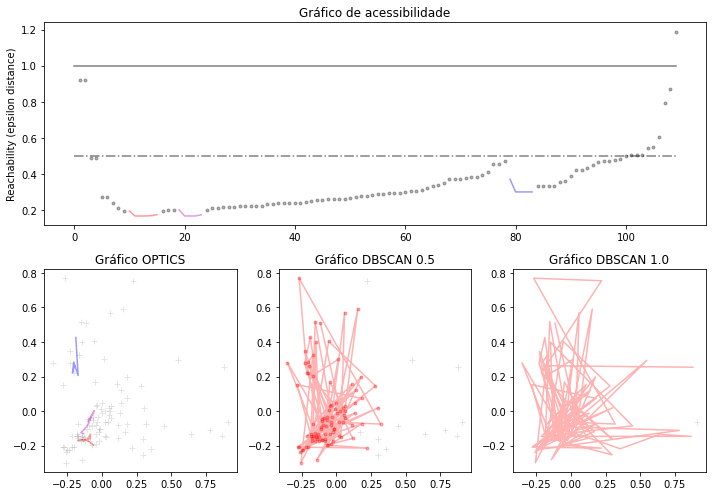

In [54]:
#Método opticas + PCA

clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

clust.fit(Aa)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=1,
)

space = np.arange(len(Aa))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Gráfico de acessibilidade
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Aak = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Aak, Rk, color, alpha=0.4)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 1.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Gráfico de acessibilidade")

# gráfico optica
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Aak = Aa[clust.labels_ == klass]
    ax2.plot(Aak[:, 0], Aak[:, 1], color, alpha=0.4)
ax2.plot(Aa[clust.labels_ == -1, 0], Aa[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Gráfico OPTICS")

# gráfico DBSCAN 0.5
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Aak = Aa[labels_050 == klass]
    ax3.plot(Aak[:, 0], Aak[:, 1], color, alpha=0.3, marker=".")
ax3.plot(Aa[labels_050 == -1, 0], Aa[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Gráfico DBSCAN 0.5")

# gráfico DBSCAN 2.
colors = ["r", "m", "b", "y", "k", "g", "w", "orange"]
for klass, color in zip(range(0, 6), colors):
    Aak = Aa[labels_200 == klass]
    ax4.plot(Aak[:, 0], Aak[:, 1], color, alpha=0.3)
ax4.plot(Aa[labels_200 == -1, 0], Aa[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Gráfico DBSCAN 1.0")

plt.tight_layout()
plt.show()

- Interpretação do dos gráficos do método ópticas

Gráfico de acessibilidade:  indica a formação de 3 verdadeiros clusters: Laranja, Roxo e Azul, os outros dados podem não apresentar as características necessárias para formar um cluster ou serem agrupados em um cluster, isso pode estar ocorrendo por estarmos utilizando valores padronizados (retirados do site scikit-learn 1.1.2) para as variáveis ou pela natureza biológica dos nossos dados talvez precisaremos de mais dimensões para ver um gráfico bom sobre os dados.

Gráfico OPTICS: Basicamente temos duas possíveis novas interpretações do gráfico de acessibilidade;
1 - As linhas coloridas são os agrupamentos de pontos de um cluster e todos os pontos que não estão em uma linha seriam outliers
2 - As linhas coloridas representam possíveis locais de um centro de um cluster
A interpretação 1 parece a mais correta, então seguindo ela temos a representação dos 3 clusters anteriores, contudo, nosso gráfico não apresenta distinção dos clusters, isso pode implicar no problema da natureza dos dados citados no "gráfico de acessibilidade", pois nossos dados podem precisar de mais dimensões para se apresentarem de forma decente.

Gráficos DBSCAN 0.5 e DBSCAN 1.0: como explicado anteriormente aqui teremos uma divisão dos dados por uma densidade pré-definida, densidade 1 = 0,5 e densidade 2 = 1, então dados que se apresentarem na zona entre 0,5 e 1 e a zona maior que 1 serão considerados ruídos, ou seja, outliers;
Na primeira zona temos 7 dados outliers
Na segunda zona temos 1 dado outliers
Isso implica que dados que não são considerados outliers são elegíveis para estarem em um cluster, mas aí caímos nos problemas da natureza dos dados (citado no "gráfico de acessibilidade") e nos problemas de interpretação (citados no "gráfico OPTICS")

- Interpretação do dos gráficos do método ópticas + PCA

Gráfico de acessibilidade: novamente o gráfico indica a formação de 3 verdadeiros clusters: Laranja, Roxo e Azul, os outros dados podem não apresentar as características necessárias para formar um cluster ou serem agrupados em um cluster, isso pode estar ocorrendo por estarmos utilizando valores padronizados (retirados do site scikit-learn 1.1.2) para as variáveis ou pela natureza biológica dos nossos dados talvez precisaremos de mais dimensões para ver um gráfico bom sobre os dados

Gráfico OPTICS: Basicamente temos duas possíveis novas interpretações do gráfico de acessibilidade;
1 - As linhas coloridas são os agrupamentos de pontos de um cluster e todos os pontos que não estão em uma linha seriam outliers
2 - As linhas coloridas representam possíveis locais de um centro de um cluster
A interpretação 1 parece a mais correta, então seguindo ela temos a representação dos 3 clusters anteriores.

Gráficos DBSCAN 0.5 e DBSCAN 1.0: como explicado anteriormente aqui teremos uma divisão dos dados por uma densidade pré-definida, densidade 1 = 0,5 e densidade 2 = 1, então dados que se apresentarem na zona entre 0,5 e 1 e a zona maior que 1 serão considerados ruídos, ou seja, outliers;
Na primeira zona temos 12 dados outliers
Na segunda zona temos 1 dado outliers
Isso implica que dados que não são considerados outliers são elegíveis para estarem em um cluster, mas aí caímos nos problemas da natureza dos dados (citado no "gráfico de acessibilidade") e nos problemas de interpretação (citados no "gráfico OPTICS")

SPOILER: O número de dados outlier na primeira zona dos dados com PCA é igual ao número de dados outlier do próximo capítulo / notebook

- Comparação entre Kmeans e o novo método;

O método Kmeans basicamente encontra forçadamente clusters sem ignorar dados que vamos considerar outliers no outro método;
Nos nossos dados escolhemos fazer duas interpretações, uma com o número ideal de clusters, que foi 8, e uma com o número de faixas de idades, que foi 6.
Na primeira interpretação basicamente achamos os clusters de forma correta, mas como falado anteriormente os plots não são ideais, pois temos o problema da natureza dos dados, já na segunda interpretação até conseguimos forças uma similaridade entre os dados clusterizados e as faixas de idades, mas caímos no mesmo problema.

Já com o método óptica, o código só achou os clusters de forma ideal, logo o número de clusters foi menor que os encontrados anteriormente, os 3 clusters encontrados apresentam um conjunto de dados muito próximos que potencialmente fazem sentido serem agrupados. Esse método também conta com um bônus que é o DBSCAN que basicamente acha outliers por densidade e a quantidade de outliers entre esse misto de método e o próximo capítulo/notebook foi muito parecido, indicando que o método de certa forma faz sentido para os nossos dados, mas infelizmente voltamos para o mesmo problema, afinal lidar com dados biológicos indica que por mais-que-tudo esteja parecendo correto, podem não estar, pois precisaríamos de mais dimensões para entender corretamente a informação contida nos nossos dados.

- Conclusão geral;

Nenhum método de agrupamento vai ser ideal ou minimamente bom para interpretar nossos dados, pois o número de dimensões necessárias é maior que a própria realidade que conseguimos interpretar, afinal, nossos dados tem natureza biológica.